In [2]:
import pandas as pd
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
from collections import defaultdict
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt
from master.nodes.ETL import summarise, text_fields

In [6]:
# Load cleaned data
reviews = io.load('reviews_clean'); summarise(reviews)

2019-07-06 07:17:17,703 - kedro.io.data_catalog - INFO - Loading data from `reviews_clean` (PickleLocalDataSet)...


,dtype,n_null,n_valid,unique,mean,std,min,25%,50%,75%,max,skew
product_id,int64,0,23486,1206,918.119,203.299,0.0,861.0,936.0,1078.0,1205.0,-2.088
author_age,int64,0,23486,77,43.199,12.280,18.0,34.0,41.0,52.0,99.0,0.526
review_title,object,3810,19676,13994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_text,object,845,22641,22635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
star_rating,int64,0,23486,5,4.196,1.110,1.0,4.0,5.0,5.0,5.0,-1.314
recommend_flag,int64,0,23486,2,0.822,0.382,0.0,1.0,1.0,1.0,1.0,-1.687
upvotes,int64,0,23486,82,2.536,5.702,0.0,0.0,1.0,3.0,122.0,6.473
product_category_division,category,0,23486,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_category_department,category,0,23486,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_category_class,category,0,23486,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
top_reviews = reviews.sort_values('star_rating', ascending = False).head(n = 100)
text_fields(top_reviews).head(n = 10)

,review_title,review_text
id,,
11743,Love!,I absolutely love this vest. it fits extremely...
13393,Gorgeous classic in navy,Byron lars knows how to make you look like a w...
13397,NaN,NaN
13398,It does work for busty gals!!!,My mom pointed out this dress in the store a w...
13399,Buy this!,Fits perfect!
13400,NaN,NaN
13405,"Comfy tee, great for xl",I ordered the navy/green combo in xl and it's ...
13406,NaN,Love the look of this poncho - which is not as...
13408,Updated classic,The fair-isle details are gorgeous and the woo...


In [12]:
pos_tokens = defaultdict(int)

for review in top_reviews['review_text']:
    # Strip punctuation
    try:
        review = re.sub(r'[^a-zA-Z\s]*', '', review)
        review = re.sub(r"[']*", '', review)
    except:
        review = ''
        
    review = review.lower()
    tokens = nltk.word_tokenize(review)

    for token in tokens:
        if token not in stopwords.words():
            pos_tokens[token] += 1

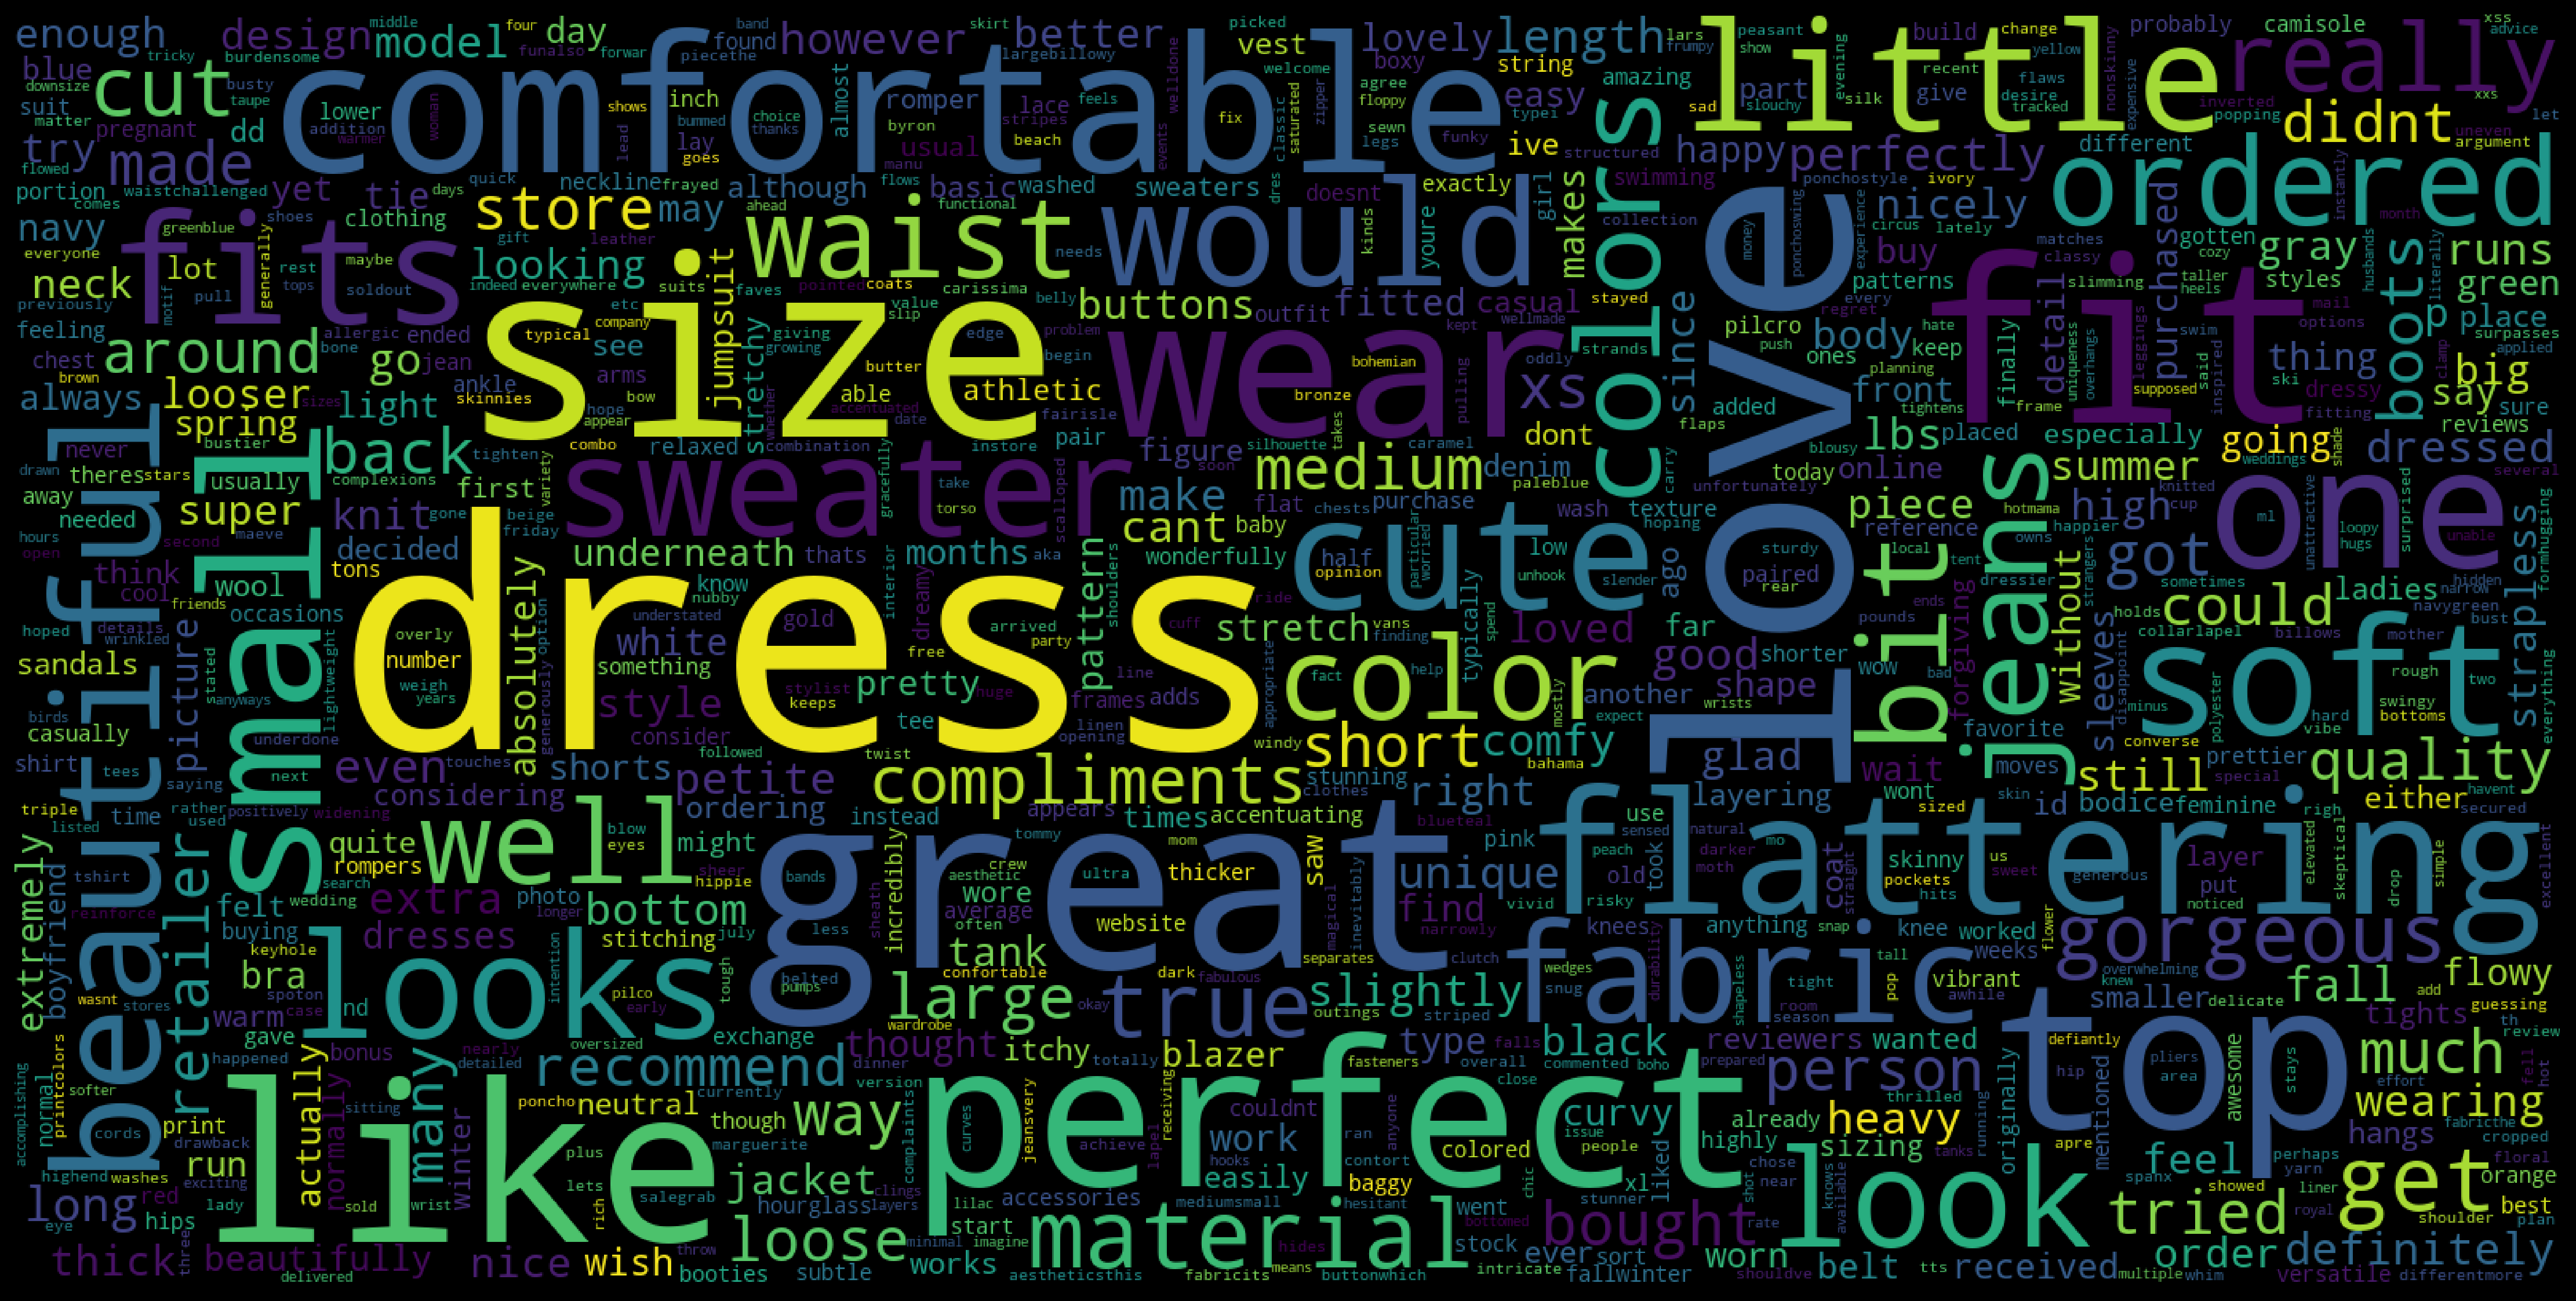

In [39]:
# Generate a high resolution word cloud
wc = WordCloud(
    max_words=1000,
    width=1600,
    height=800,
    max_font_size=200
)
wc.generate_from_frequencies(pos_tokens)
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()